# conv Net
### 네트워크 구성

1. Fully Conted Network

    ```
    x -> @ -> @ -> @ - FC

    ```
2. convotional Neural Network

    ```
    x1
    x2  - Y  = Conv N
    x3 
    ```
    * 각각의 입력으로 넘기게 되는 데 이 층을 conv layer라고 한다. 
    * conv, ReLU, Pool을 여러번하고 FC로 마지막 lable을 붙일 수 있다. 

### conv Net 순서
1. filter size를 정한다. (큰 사진에서 작은 부분을 걸러낸다.) <br>
filter는 한 값을 만들어낸다.  
<br>
각각의 fileter는 weight가 다르다.
2. strid 크기를 정한다. (이동크기) <br>
Output Size <br>
(N-F) / stride + 1 
3. padding을 추가해준다.
7*7 -> 9*9
4. image를 7*7로 넣어서 padd를 추가하면 같은 사이즈의 image가 나온다. <br>
입력의 이미지와 출력의 이미지가 같도록 한다.

#### Pooling layer란?
sampling!! <br>
resize!!!! 
<br><br>
* size, filter , stride, pooling으로 output의 크기를 결정할 수 있고, output값을 뽑을 수 있다. 
<br><br>
예 ) Max pool with 2*2 filters and stride 2
    1. 원래 4 * 4
    2. fileter 2*2
    3. stride 2 <br>
       따라서, filter는 총 4개가 나온다. 
    4. 한 filter에서 여러 pooling 방법을 사용해, 값을 선택한다. 
    
#### Max Pooling
filter: 1, 1, 5, 6  `->(pooling)` 6


## Case Study
#### AlexNet
ImageNet 경진대회에서 1등을 함. 
#### GoogLeNet
Inception module
#### ResNet
alexnet 경우 layer가 8 <br>
ResNet, 152 Layer <br>
학습하기 어려웠을텐데.. layer갯수는 크지만? 실제로는 학습 수는 적을수도? <br>
Residual net
#### Conolution Network로 이미지 뿐만 아니라 text도 처리할 수 있다. 
Convolution neural Networks for sentence classification
#### AlphaGo

NetWork를 자기마음대로 연결시켜, 조금 더 정확한 Output을 만들었다. 

#### CNN for CT images 

# CNN
Neural Network에서 가장 많이 쓰이는 <br>
<br><br>
1. 입력된 이미지, 입력된 vector를 convolution이라는 방법을 통해서 여러가지 convolution layer로 값을 뽑아낸다. 
2. sub sampling
3. feature extraction 이미지, vector에서 특징을 뽑아낸다. 
4. fully conectied를 통해 , classification을 하던지, regression을 할 수 있다.

주어진 image에 filter를 적용, filter에 대해 한개의 값을 뽑아낸다. 
<br>
subsampling

## Simple Convoltion Layer

In [9]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sess = tf.InteractiveSession()

In [6]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)

In [8]:
image.shape
# 1은 하나의 image만 사용하겠다. 

(1, 3, 3, 1)

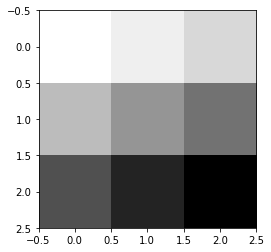

In [10]:
plt.imshow(image.reshape(3, 3), cmap='Greys')

In [12]:
# filter의 크기를 정의
# filter : 2, 2, 1, 1
# 2, 2, (1), 1
# 1: color
# 2, 2, 1, (1)
# 1: filters

# weight는 1, 1, 1, 1
# 1*1 + 1*2 + 4*1 + 5*1 = 12

### Image: 1, 3, 3, 1 image, 
### Filter: 2, 2, 1, 1 
### stride: 1* 1, 
### Padding: VALID

In [13]:
print(image.shape)

(1, 3, 3, 1)


In [19]:
# weight = tf.constant([[[[1.], [1.]],
#                       [[1.], [1.]]]])
# print(weight.shape)
# (1, 2, 2, 1)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print(weight.shape)

(2, 2, 1, 1)


In [23]:
conv2d = tf.nn.conv2d(image, weight, strides = [1, 1, 1, 1], padding='VALID')
# 실행값 저장
conv2d_img = conv2d.eval()

In [26]:
print(conv2d.shape)
print(conv2d_img.shape)

(1, 2, 2, 1)
(1, 2, 2, 1)


In [29]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print(conv2d_img)
print(conv2d_img.shape)
print(conv2d)

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)
Tensor("Conv2D_3:0", shape=(1, 2, 2, 1), dtype=float32)


[[12. 16.]
 [24. 28.]]


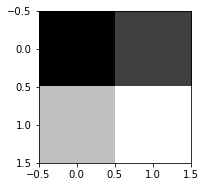

In [33]:
for i, one_img in enumerate(conv2d_img):
    # convolution값 출력
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

#### Padding option
* SAME: 1, 3, 3, 1 -> 3*3으로 뽑아준다. <br>
입력의 size와 출력의 사이즈가 같아진다. 



image (1, 3, 3, 1)
weight (2, 2, 1, 1)
conv2d_img (1, 3, 3, 1)
conv2d_img before swapaxes
 [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
conv2d_img after swapaxes
 [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


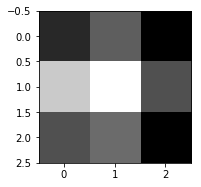

In [41]:
print("image", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]], [[1.]]]])
print("weight", weight.shape)

# convolution
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d.shape)
print("conv2d_img before swapaxes\n", conv2d_img)

# swampaxes?
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("conv2d_img after swapaxes\n", conv2d_img)

# conv 값 img
# for i, oen_img in enumerate(conv2d_img):
#     print(one_img.reshape(3, 3))
#     plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')
    
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### filter를 여러개 사용할 수 있다. 
weight (2, 2, 1, 1) -> filter 1나
```
weight.shape
(2, 2, 1, 3)
```
filter3개

image (1, 3, 3, 1)
weight (2, 2, 1, 3)
conv2d_img (1, 3, 3, 3)
conv2d_img before swapaxes
 [[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]]
conv2d_img after swapaxes
 [[[[ 12.]
   [ 16.]
   [  9.]]

  [[ 24.]
   [ 28.]
   [ 15.]]

  [[ 15.]
   [ 17.]
   [  9.]]]


 [[[120.]
   [160.]
   [ 90.]]

  [[240.]
   [280.]
   [150.]]

  [[150.]
   [170.]
   [ 90.]]]


 [[[-12.]
   [-16.]
   [ -9.]]

  [[-24.]
   [-28.]
   [-15.]]

  [[-15.]
   [-17.]
   [ -9.]]]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


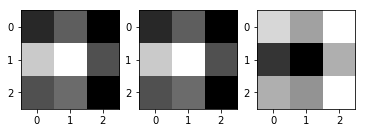

In [43]:
print("image", image.shape)
# weight의 변화
weight = tf.constant([[[[1., 10., -1.]],[[1., 10., -1.]]],
                     [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight", weight.shape)

# convolution
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d.shape)
print("conv2d_img before swapaxes\n", conv2d_img)

# swampaxes?
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("conv2d_img after swapaxes\n", conv2d_img)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    # 3으로 바꿔줘야함. 
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## Max Pooling

In [44]:
image = np.array([[[[4], [3]], 
                  [[2], [1]]]], dtype=np.float32)
print(image.shape)

(1, 2, 2, 1)


In [45]:
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                     strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## Using Mnist Dataset
학습과 추정을 위한 MNIST 데이터셋을 다운로드 <br>
[Mnist dataset 설명](https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/mnist/download/)

In [48]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../../../../DATA/MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../../../../../DATA/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../../../../../DATA/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../../../../../DATA/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../../../../../DATA/MNIST_data/t10k-labels-idx1-ubyte.gz


In [55]:
print(type(mnist))

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


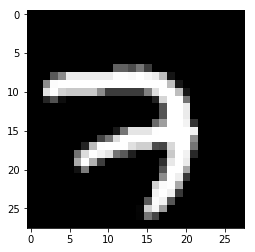

In [57]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

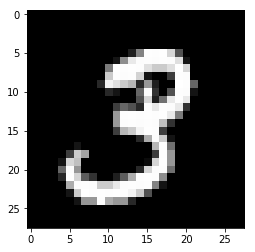

In [56]:
img = mnist.train.images[1].reshape(28, 28)
plt.imshow(img, cmap='gray')

## MNIST Convolution layer

Tensor("Conv2D_13:0", shape=(1, 14, 14, 5), dtype=float32)


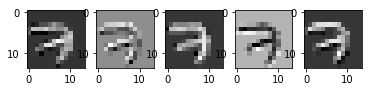

In [66]:
sess = tf.InteractiveSession()

# 여러개의 이미지, 28 * 28, color (28by28 image의 한 색깔의 이미지)
img = img.reshape(-1,28,28,1)
# 3by3, color, filter5개
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# strides 28*28 -> 14* 14
conv2d = tf.nn.conv2d(img, W1, strides = [1, 2, 2, 1], padding = 'SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
# 그냥 그림을 출력
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


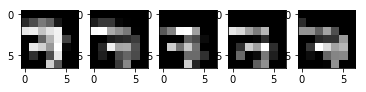

In [69]:
# 5개의 fileter를 사용해서 5개의 이미지가 나왔다. 
pool = tf.nn.max_pool(conv2d, ksize= [1, 2, 2, 1], strides= [
    1, 2, 2, 1], padding='SAME')

print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

StopIteration: 
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')